### Polinomio 4° grado, massa fissa, Coltello 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [3]:
xx, yy, aa, bb, cc, dd, ee = symbols('xx yy aa bb cc dd ee')

In [4]:
xdataor = np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
npoint = len(xdataor)
npoint
ax,bx = float(xdataor[0]),float(xdataor[npoint-1])
apx,bpx = 2./(bx-ax),(bx + ax)/(bx - ax)
print(ax)
print(bx)
print(apx)
print(bpx)
xdata = xdataor*apx - bpx
xdata
xdata=xdataor

0.2
1.0
2.5
1.4999999999999998


In [5]:
ydata = np.array([2.068,1.958,1.899,1.877,1.880,1.903,1.940,1.986,2.038])
yerr = np.array([0.001]*9)
if (len(xdata)!=len(ydata)): print ("dimensioni vettori disuguali")
if (len(yerr)!=len(ydata)): print ("dimensioni vettori disuguali")
#ydata

We want to find the parameters $a$,$b$,$c$ and $d$ of the cubic $y = d x^3 +c x^2 + b x + a$ which minimize:
$ \chi^2 = \sum_i \frac{(y_i - d x^3-c x_i^2 - b x_i - a)^2}{\sigma_i^2}$

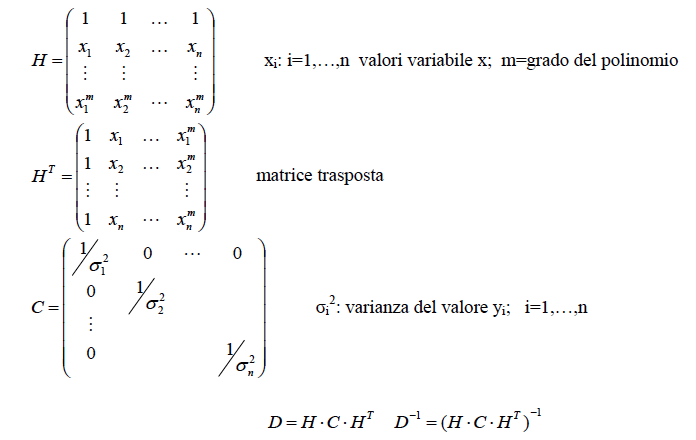

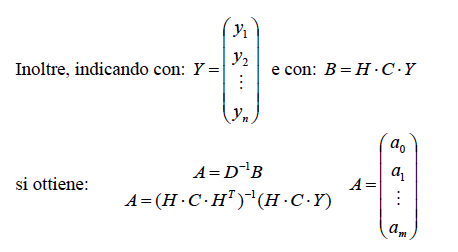

Calcolo matrice H e matrice trasposta

In [6]:
vect1=np.array([1]*9)
vect2=xdata
vect3=xdata**2
vect4=xdata**3
vect5=xdata**4
matH=np.matrix([vect1,vect2,vect3,vect4,vect5])
matHT = matH.T
#matH,matHT

calcolo matrice della varianza

In [7]:
varyinv = 1./(yerr*yerr)
matC=np.diag(varyinv)
#varyinv,matC

In [8]:
ydataprovv=ydata
matY=ydataprovv.reshape((-1, 1))
#matY

calcolo matrice A dei parametri

In [9]:
mat1=matH*matC*matHT
mat1_inv=np.linalg.inv(mat1)
mat2=matH*matC*matY
matA=np.dot(mat1_inv,mat2)
#matA

In [10]:
a, b, c, d , e= matA[0],matA[1],matA[2],matA[3],matA[4]
print (" a = ", a)
print (" b = ", b)
print (" c = ", c)
print (" d = ", d)
print (" e = ", e)

 a =  [[2.49166667]]
 b =  [[-2.97255439]]
 c =  [[4.87030886]]
 d =  [[-3.19910645]]
 e =  [[0.8479021]]


In [11]:
vara, varb, varc, vard , vare= mat1_inv[0,0], mat1_inv[1,1], mat1_inv[2,2],mat1_inv[3,3],mat1_inv[4,4]
erra=np.sqrt(vara)
errb=np.sqrt(varb)
errc=np.sqrt(varc)
errd=np.sqrt(vard)
erre=np.sqrt(vare)
print (" errore su a = ",erra)
print (" errore su b = ",errb)
print (" errore su c = ",errc)
print (" errore su d = ",errd)
print (" errore su e = ",erre)

 errore su a =  0.010498677165295085
 errore su b =  0.09086293235866622
 errore su c =  0.26457834319614437
 errore su d =  0.31401203310667825
 errore su e =  0.13037212891068956


Plot, adding extra points for the cubic.

In [30]:
thickxdata = np.arange(0.1,1.1,0.001)
thx2 = thickxdata**2
thx3 = thickxdata**3
thx4 = thickxdata**4
thydata = e*thx4 + d*thx3 + c*thx2 + b*thickxdata + a
thiyarr=np.array(thydata)
thickydata=thiyarr.T

<ErrorbarContainer object of 3 artists>

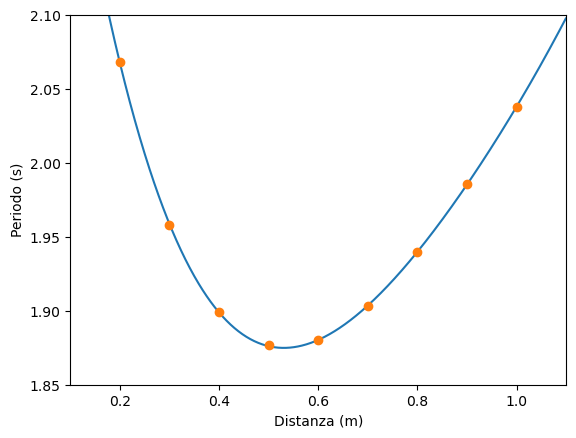

In [31]:
fig, ax = plt.subplots()
ax.set_xlabel('Distanza (m)')
ax.set_ylabel('Periodo (s)')
ax.set_xlim(0.1, 1.1); ax.set_ylim(1.850, 2.100) 
plt.plot(thickxdata,thickydata)
plt.errorbar(xdata,ydata,yerr=yerr,fmt='o')

In [28]:
x2=xdata**2
x3=xdata**3
x4=xdata**4
thyatt=e*x4+d*x3+c*x2+b*xdata+a
ydatatt=np.array(thyatt)
scarto1 = (ydata-ydatatt)/yerr
scarto2 = (ydata-ydatatt)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-4)).sum()
errst = np.sqrt(errstSq)
print (" Chi^2 = ",chi2)
print (" errore standard della stima = ",errst)

 Chi^2 =  2.2797202797210683
 errore standard della stima =  0.0006752362963764712


In [29]:
sum_y = (ydata).sum()
ymean=sum_y/npoint
ameany = ydata-ymean
vary = (ameany*ameany).sum()
scarto3=ydatatt-ymean
var_numeratore=(scarto3*scarto3).sum()
detercoeff2=var_numeratore/vary
detercoeff=np.sqrt(detercoeff2)
print ("coefficiente determinazione = ",detercoeff)

coefficiente determinazione =  0.9999701344565144
